# Exploring the functionality within the `hime.LogisticRegression` class

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss, roc_curve, roc_auc_score, confusion_matrix
import session_info

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
current_wd = os.getcwd()
os.chdir(current_wd.split("/notebook")[0])
from hime.logistic_model import LogisticRegression
os.chdir(current_wd)

In [4]:
session_info.show(write_req_file=False)

## Make X and y data

In [5]:
amount_of_features = 10
amount_informative = 2
X, y = make_classification(n_samples=300,
    n_features=amount_of_features,
    n_informative=amount_informative,
#                              noise=5,
#                              coef=True, 
                            random_state=42)

In [6]:
# X = X + 100

## Fit the model

In [7]:
df = (pd.DataFrame(X, columns=[f"feat_{x}" for x in range(0, X.shape[1])])
.merge(pd.DataFrame(y, columns=["target"]),
      left_index=True,
      right_index=True))

In [8]:
df.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,target
0,-0.025,1.452,-1.203,1.248,-0.508,0.923,0.300,-0.453,-0.148,0.327,1
1,0.750,0.098,0.664,-0.680,0.254,-0.339,-0.392,1.086,0.468,0.308,0
2,-1.236,-0.839,-0.903,0.922,0.538,0.411,-1.966,-0.365,1.073,-1.045,1
3,-1.615,-0.756,-0.722,0.729,-0.668,0.183,-0.898,-0.175,0.992,0.537,1
4,-0.724,0.633,0.952,-0.997,-0.832,-0.903,-1.516,-0.552,0.471,0.203,0


In [9]:
df_train = df.sample(frac=0.8, random_state=69420)
df_test = df.drop(df_train.index)

In [10]:
df_train.shape, df_test.shape

((240, 11), (60, 11))

## Fit the romeo LogisticRegression

In [11]:
reg = LogisticRegression(fit_intercept=True,
                      normalize=True).fit(X=df_train.filter(regex="feat"), 
                                               y=df_train["target"], 
                                               verbose=False)

CasADi - 2021-10-21 15:01:47 WARNING("ols:nlp_grad_f failed: NaN detected for output grad_f_x, at (row 0, col 0).") [.../casadi/core/oracle_function.cpp:265]
CasADi - 2021-10-21 15:01:47 WARNING("ols:nlp_grad_f failed: NaN detected for output grad_f_x, at (row 0, col 0).") [.../casadi/core/oracle_function.cpp:265]


In [12]:
reg.intercept_, reg.coef_ 

(0.0, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [13]:
reg.summary_.round(3)
#reg.score(X, y)

AttributeError: 'LogisticRegression' object has no attribute 'summary_'

In [14]:
# reg.fit_evaluation_.round(3)

## Show the available methods and attributes of the fitted model

In [15]:
np.array(dir(reg))

array(['__class__', '__delattr__', '__dict__', '__dir__', '__doc__',
       '__eq__', '__format__', '__ge__', '__getattribute__',
       '__getstate__', '__gt__', '__hash__', '__init__',
       '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__',
       '__new__', '__reduce__', '__reduce_ex__', '__repr__',
       '__setattr__', '__setstate__', '__sizeof__', '__str__',
       '__subclasshook__', '__weakref__', '_check_n_features',
       '_estimator_type', '_get_param_names', '_get_tags', '_more_tags',
       '_repr_html_', '_repr_html_inner', '_repr_mimebundle_',
       '_validate_data', 'aic', 'bic', 'coef_', 'conf_int', 'copy_X',
       'cost', 'ess', 'f_pvalue', 'fit', 'fit_intercept', 'fvalue',
       'get_params', 'intercept_', 'is_fitted_', 'loglike', 'mse_model',
       'mse_resid', 'mse_total', 'normalize', 'params', 'positive',
       'predict', 'predictors', 'resid', 'rsquared', 'rsquared_adj',
       'score', 'set_params', 'ssr', 'target', 'theta', 'uncentered_ts

In [16]:
# reg.conf_int()

In [17]:
reg.df_resid

AttributeError: 'LogisticRegression' object has no attribute 'df_resid'

In [18]:
intercept = reg.intercept_
coefs = reg.coef_

In [19]:
coefs

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
coefs.reshape(1,-1)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [21]:
coefs*df_train.filter(regex="feat").head()

Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9
110,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000
139,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000
21,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000
86,0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000
81,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000


In [22]:
tmp_x = df_train.filter(regex="feat").assign(intercept=1).set_index("intercept").reset_index().values

In [23]:
tmp_x = reg.intercept_ * tmp_x

In [24]:
# np.linalg.inv(np.dot(tmp_x.T, tmp_x))

In [25]:
cov_mat = np.linalg.inv(np.matmul(tmp_x.transpose(1,0), tmp_x))

LinAlgError: Singular matrix

In [26]:
# abs(cov_mat)

In [27]:
# np.sqrt(np.diag(abs(cov_mat)))

In [28]:
# pd.DataFrame(np.cov(tmp_x))

In [29]:
# Statsmodels cov_params
"""
Notes
-----
(The below are assumed to be in matrix notation.)
If no argument is specified returns the covariance matrix of a model
``(scale)*(X.T X)^(-1)``
If contrast is specified it pre and post-multiplies as follows
``(scale) * r_matrix (X.T X)^(-1) r_matrix.T``
If contrast and other are specified returns
``(scale) * r_matrix (X.T X)^(-1) other.T``
If column is specified returns
``(scale) * (X.T X)^(-1)[column,column]`` if column is 0d
OR
``(scale) * (X.T X)^(-1)[column][:,column]`` if column is 1d
"""

'\nNotes\n-----\n(The below are assumed to be in matrix notation.)\nIf no argument is specified returns the covariance matrix of a model\n``(scale)*(X.T X)^(-1)``\nIf contrast is specified it pre and post-multiplies as follows\n``(scale) * r_matrix (X.T X)^(-1) r_matrix.T``\nIf contrast and other are specified returns\n``(scale) * r_matrix (X.T X)^(-1) other.T``\nIf column is specified returns\n``(scale) * (X.T X)^(-1)[column,column]`` if column is 0d\nOR\n``(scale) * (X.T X)^(-1)[column][:,column]`` if column is 1d\n'

## Plot the original data and the lines of best fit for each of the predictors on the target

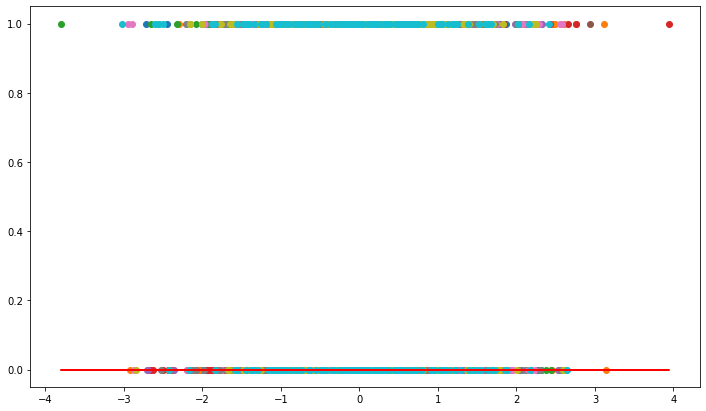

In [30]:
_ = plt.figure(figsize=(12, 7))
_ = plt.plot(df_train.filter(regex="feat"), 
             df_train["target"], 
             'o', 
             label='original data')
_ = plt.plot(df_train.filter(regex="feat"), 
             intercept + coefs*df_train.filter(regex="feat"), 
             'r', 
             label='fitted line')
# _ = plt.legend()

## With the fitted model attempt to predict the test data

In [31]:
y_pred = reg.predict(df_test.filter(regex="feat"))
y_pred.head(2)

,y_pred
9,0.500
37,0.500


In [32]:
y_test = df_test[["target"]]
y_test.head(2)

,target
9,1
37,1


## Calculate the Log loss between the predicted vs the real scores

In [33]:
log_loss_score = log_loss(y_test["target"], 
        y_pred)
log_loss_score

0.6931471805599454

## Plot the predicted vs the real values

In [34]:
c_mat = confusion_matrix(y_test["target"], y_pred.round(0))

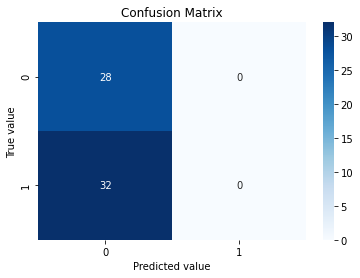

In [35]:
cmap='Blues'
categories=["0", "1"]

_ = sns.heatmap(c_mat, 
                annot=True,            
#                 fmt="",
                cmap=cmap,
#                 cbar=cbar,
                xticklabels=categories,
                yticklabels=categories
               )
_ = plt.title("Confusion Matrix")
# _ = plt.xlabel(f'Predicted value\n\nAccuracy={summary_df["Accuracy"].values[0]}\nSensitivity={summary_df["Sensitivity"].values[0]}\nSpecificity={summary_df["Specificity"].values[0]}\nF1 Score={summary_df["F1"].values[0]}')
_ = plt.xlabel(f'Predicted value')
_ = plt.ylabel("True value")

In [36]:
# _ = plt.figure(figsize=(12, 7))
# _ = plt.plot(y_test["target"], 
#              y_pred, 
#              'o', 
# #              label='original data'
#             )
# _ = plt.annotate(text = f"Log Loss = {round(log_loss, 5)}",
#                  xy=(0.9, 0.1),)

In [37]:
fpr, tpr, thresh = roc_curve(y_true=y_test["target"], y_score=y_pred, pos_label=1, sample_weight=None, drop_intermediate=False)

In [38]:
auc_score = roc_auc_score(y_true=y_test["target"], y_score=y_pred)

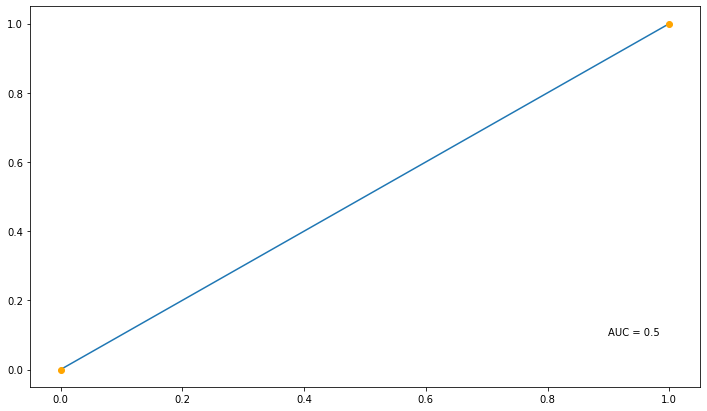

In [39]:
_ = plt.figure(figsize=(12, 7))
_ = plt.plot(fpr, 
             tpr, 
#              'o', 
            )
_ = plt.plot(fpr, 
             tpr, 
             'o',
             c="orange"
            )

_ = plt.annotate(text = f"AUC = {round(auc_score, 5)}",
                 xy=(0.9, 0.1),)

# Statsmodels

In [40]:
import statsmodels
# from statsmodels.regression.linear_model import OLS
from statsmodels.discrete.discrete_model import Logit
from scipy import stats

In [41]:
# df_train["target"]
# statsmodels.tools.tools.add_constant(data=df_train.filter(regex="feat"), prepend=True, has_constant='skip')

In [42]:
res = Logit(endog=df_train["target"], exog=statsmodels.tools.tools.add_constant(data=df_train.filter(regex="feat"), prepend=True, has_constant='skip')).fit()
# res = Logit(endog=df_train["target"], exog=df_train.filter(regex="feat"), prepend=True, has_constant='skip').fit()

         Current function value: 0.202515
         Iterations: 35


/opt/miniconda3/envs/pymer4_env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [43]:
coefs

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [44]:
res.params

const    -0.116
feat_0    0.316
feat_1    0.291
feat_2   -1.449
feat_3    1.507
feat_4   -0.059
feat_5    1.192
feat_6   -0.186
feat_7    0.372
feat_8    0.275
feat_9    0.019
dtype: float64

In [45]:
# def bse(self):
#         return np.sqrt(np.diag(self.cov_params()))

In [46]:
np.round(res.bse, 3)

const    0.270
feat_0     nan
feat_1   0.247
feat_2     nan
feat_3     nan
feat_4   0.284
feat_5     nan
feat_6   0.251
feat_7   0.279
feat_8   0.282
feat_9   0.270
dtype: float64

In [47]:
np.sqrt(np.diag(res.cov_params()))

/var/folders/rc/1g_69mqs4t5dxcsd6dbczl_m0000gn/T/ipykernel_4643/3404882093.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(np.diag(res.cov_params()))


array([0.26961015,        nan, 0.2470222 ,        nan,        nan,
       0.283841  ,        nan, 0.25069705, 0.27905625, 0.28220322,
       0.27024427])

In [48]:
res.cov_params()

,const,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9
const,0.073,-0.001,-0.005,0.018,-0.002,0.009,-0.002,-0.004,-0.001,-0.000,0.002
feat_0,0.005,-80544246683306.047,0.001,206848537712461.844,-61431330697088.648,0.008,350404437956444.375,0.009,0.001,-0.007,0.000
feat_1,-0.005,0.007,0.061,-0.014,0.046,0.007,-0.043,0.003,0.004,0.001,-0.001
feat_2,-0.002,241481911792557.469,0.006,-814517098063326.125,-10782764511563.660,-0.018,-1040288202666481.625,-0.034,-0.006,-0.014,0.004
feat_3,-0.001,-26690526379933.066,0.041,-126416831645487.594,-215923418623698.562,0.007,126416831645487.609,-0.002,0.018,0.006,0.003
feat_4,0.009,0.001,0.007,0.006,0.009,0.081,-0.013,-0.012,0.002,-0.002,0.007
feat_5,-0.023,348574585390968.312,-0.011,-884917821518413.250,276159640467745.031,-0.042,-1517001979745851.500,-0.058,0.022,-0.003,0.014
feat_6,-0.004,0.009,0.003,-0.032,0.001,-0.012,-0.059,0.063,0.004,-0.001,0.001
feat_7,-0.001,0.013,0.004,-0.034,0.030,0.002,-0.029,0.004,0.078,0.010,0.018
feat_8,-0.000,0.006,0.001,-0.061,0.005,-0.002,-0.061,-0.001,0.010,0.080,-0.004


In [49]:
np.array(dir(res))

array(['__class__', '__delattr__', '__dict__', '__dir__', '__doc__',
       '__eq__', '__format__', '__ge__', '__getattribute__',
       '__getstate__', '__gt__', '__hash__', '__init__',
       '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__',
       '__new__', '__reduce__', '__reduce_ex__', '__repr__',
       '__setattr__', '__sizeof__', '__str__', '__subclasshook__',
       '__weakref__', '_cache', '_data_attr', '_data_in_cache',
       '_get_endog_name', '_get_robustcov_results', '_use_t', 'aic',
       'bic', 'bse', 'conf_int', 'cov_kwds', 'cov_params', 'cov_type',
       'df_model', 'df_resid', 'f_test', 'fittedvalues', 'get_margeff',
       'initialize', 'k_constant', 'llf', 'llnull', 'llr', 'llr_pvalue',
       'load', 'mle_retvals', 'mle_settings', 'model', 'nobs',
       'normalized_cov_params', 'params', 'pred_table', 'predict',
       'prsquared', 'pvalues', 'remove_data', 'resid_dev',
       'resid_generalized', 'resid_pearson', 'resid_response', 'save',
    

In [50]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  240
Model:                          Logit   Df Residuals:                      231
Method:                           MLE   Df Model:                            8
Date:                Thu, 21 Oct 2021   Pseudo R-squ.:                  0.7078
Time:                        15:02:12   Log-Likelihood:                -48.604
converged:                      False   LL-Null:                       -166.35
Covariance Type:            nonrobust   LLR p-value:                 2.044e-46
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1164      0.270     -0.432      0.666      -0.645       0.412
feat_0         0.3157        nan        nan        nan         nan         nan
feat_1         0.2906      0.247      1.177      0.239      -0.194       0.775
feat_2        -1.4487        nan        nan        nan         nan         nan
feat_3         1.5071        nan        nan        nan         nan         nan
feat_4        -0.0589      0.284     -0.208      0.836      -0.615       0.497
feat_5         1.1920        nan        nan        nan         nan         nan
feat_6        -0.1860      0.251     -0.742      0.458      -0.677       0.305
feat_7         0.3723      0.279      1.334      0.182      -0.175       0.919
feat_8         0.2746      0.282      0.973      0.331      -0.279       0.828
feat_9         0.0193      0.270      0.071      0.943      -0.510       0.549
==============================================================================
"""

In [51]:
reg.summary_.round(3)

AttributeError: 'LogisticRegression' object has no attribute 'summary_'

In [52]:
y_pred = res.predict(exog=statsmodels.tools.tools.add_constant(data=df_test.filter(regex="feat"), prepend=True, has_constant='skip'))

## Plot the predicted vs the real values

In [53]:
c_mat = confusion_matrix(y_test["target"], y_pred.round(0),)

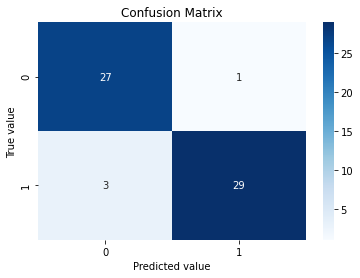

In [54]:
cmap='Blues'
categories=["0", "1"]

_ = sns.heatmap(c_mat, 
                annot=True,            
#                 fmt="",
                cmap=cmap,
#                 cbar=cbar,
                xticklabels=categories,
                yticklabels=categories
               )
_ = plt.title("Confusion Matrix")
# _ = plt.xlabel(f'Predicted value\n\nAccuracy={summary_df["Accuracy"].values[0]}\nSensitivity={summary_df["Sensitivity"].values[0]}\nSpecificity={summary_df["Specificity"].values[0]}\nF1 Score={summary_df["F1"].values[0]}')
_ = plt.xlabel(f'Predicted value')
_ = plt.ylabel("True value")

In [55]:
log_loss_score = log_loss(y_test["target"], 
        y_pred)
log_loss_score

0.1722146936512775

In [56]:
# _ = plt.figure(figsize=(12, 7))
# _ = plt.plot(y_test["target"], 
#              y_pred, 
#              'o', 
# #              label='original data'
#             )
# _ = plt.annotate(text = f"Log Loss = {round(log_loss, 5)}",
#                  xy=(0.9, 0.1),)

In [57]:
fpr, tpr, thresh = roc_curve(y_true=y_test["target"], y_score=y_pred, pos_label=1, sample_weight=None, drop_intermediate=False)

In [58]:
auc_score = roc_auc_score(y_true=y_test["target"], y_score=y_pred)

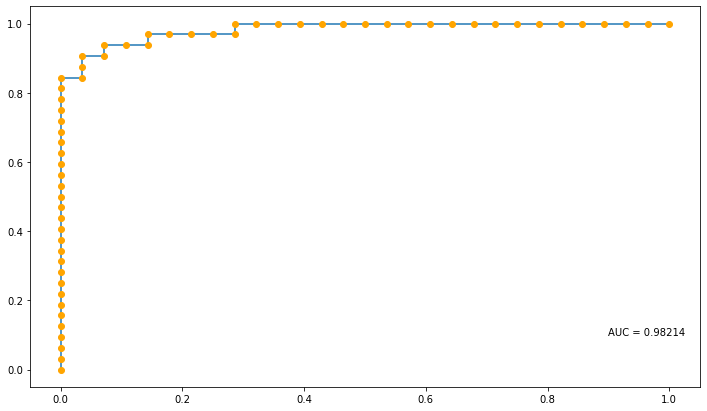

In [59]:
_ = plt.figure(figsize=(12, 7))
_ = plt.plot(fpr, 
             tpr, 
#              'o', 
            )
_ = plt.plot(fpr, 
             tpr, 
             'o',
             c="orange"
            )

_ = plt.annotate(text = f"AUC = {round(auc_score, 5)}",
                 xy=(0.9, 0.1),)

In [60]:
reg.fit_evaluation_.round(4)

AttributeError: 'LogisticRegression' object has no attribute 'fit_evaluation_'

In [61]:
stop!

SyntaxError: invalid syntax (3319058519.py, line 1)

In [62]:
res.llf

-48.60352327678345

In [63]:
res.params / res.bse

const    -0.432
feat_0      nan
feat_1    1.177
feat_2      nan
feat_3      nan
feat_4   -0.208
feat_5      nan
feat_6   -0.742
feat_7    1.334
feat_8    0.973
feat_9    0.071
dtype: float64

In [64]:
res.tvalues

const    -0.432
feat_0      nan
feat_1    1.177
feat_2      nan
feat_3      nan
feat_4   -0.208
feat_5      nan
feat_6   -0.742
feat_7    1.334
feat_8    0.973
feat_9    0.071
dtype: float64

In [65]:
res.pvalues

const    0.666
feat_0     nan
feat_1   0.239
feat_2     nan
feat_3     nan
feat_4   0.836
feat_5     nan
feat_6   0.458
feat_7   0.182
feat_8   0.331
feat_9   0.943
dtype: float64

In [66]:
res.df_resid

231.0

In [67]:
stats.t.sf(np.abs(res.tvalues), res.df_resid) * 2

array([0.66646066,        nan, 0.24058581,        nan,        nan,
       0.83576289,        nan, 0.4588142 , 0.18344517, 0.33157256,
       0.94317681])

In [68]:
type(res.summary())

statsmodels.iolib.summary.Summary

In [69]:
res.conf_int()

,0,1
const,-0.645,0.412
feat_0,nan,nan
feat_1,-0.194,0.775
feat_2,nan,nan
feat_3,nan,nan
feat_4,-0.615,0.497
feat_5,nan,nan
feat_6,-0.677,0.305
feat_7,-0.175,0.919
feat_8,-0.279,0.828


In [70]:
res.rsquared

AttributeError: 'LogitResults' object has no attribute 'rsquared'

In [71]:
res.ssr

AttributeError: 'LogitResults' object has no attribute 'ssr'

In [72]:
res.resid

AttributeError: 'LogitResults' object has no attribute 'resid'

In [73]:
reg.resid

<bound method LogisticRegression.resid of LogisticRegression(normalize=True)>